In [0]:
from tensorflow.keras.models import Model
from PIL import Image

In [18]:
!cat ~/.keras/keras.json

{
    "epsilon": 1e-07, 
    "floatx": "float32", 
    "image_data_format": "channels_last", 
    "backend": "tensorflow"
}

In [0]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Input,Conv2DTranspose,MaxPooling2D,UpSampling2D

In [0]:
img_x,img_y = 28,28

In [0]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [22]:
x_train = x_train.reshape(x_train.shape[0],img_x,img_y,1)
x_train = x_train.astype('float32')
x_train/=255
x_train.shape

x_test = x_test.reshape(x_test.shape[0],img_x,img_y,1)
x_test = x_test.astype('float32')
x_test/=255
x_test.shape

(10000, 28, 28, 1)

In [0]:
#noise

noise_factor = 0.4
x_train_noisy = noise_factor*np.random.normal(size=x_train.shape) + x_train

x_train_noisy = np.clip(x_train_noisy,0.,1.)
x_test_noisy = noise_factor*np.random.normal(size=x_test.shape) + x_test
x_test_noisy = np.clip(x_test_noisy,0.,1.)

In [0]:
ins = (img_x,img_y,1)
input_layer = Input(ins)

In [0]:
x = Conv2D(10,5,activation='relu')(input_layer)
x = MaxPooling2D(2)(x)
x = Conv2D(20,2,activation='relu')(x)
x = MaxPooling2D(2)(x)
encoded = x

x = UpSampling2D(2)(x)
x = Conv2DTranspose(20,2,activation='relu')(x)
x = UpSampling2D(2)(x)
x = Conv2DTranspose(10,5,activation='relu')(x)
x = Conv2DTranspose(1,3,activation='sigmoid')(x)


In [26]:
from tensorflow.keras import Model
model = Model(input_layer,x)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 10)        260       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 20)        820       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 20)          0         
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 10, 10, 20)        0         
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 11, 11, 20)        1620

In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [38]:
history=model.fit(x_train_noisy,x_train,batch_size=32,epochs=10,validation_data=(x_test_noisy,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 151us/sample - loss: 0.0899 - acc: 0.8142 - val_loss: 0.0892 - val_acc: 0.8133
Epoch 2/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.0896 - acc: 0.8142 - val_loss: 0.0891 - val_acc: 0.8133
Epoch 3/10
60000/60000 [==============================] - 9s 144us/sample - loss: 0.0894 - acc: 0.8142 - val_loss: 0.0887 - val_acc: 0.8133
Epoch 4/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0892 - acc: 0.8142 - val_loss: 0.0885 - val_acc: 0.8132
Epoch 5/10
60000/60000 [==============================] - 9s 146us/sample - loss: 0.0891 - acc: 0.8143 - val_loss: 0.0884 - val_acc: 0.8133
Epoch 6/10
60000/60000 [==============================] - 9s 144us/sample - loss: 0.0890 - acc: 0.8143 - val_loss: 0.0883 - val_acc: 0.8133
Epoch 7/10
60000/60000 [==============================] - 9s 146us/sample - loss: 0.0888 - acc: 0.8143 - val_l

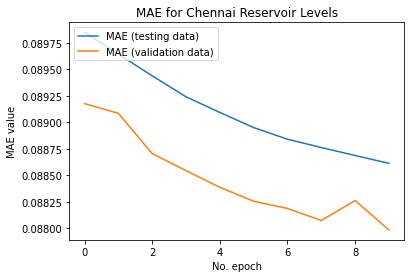

In [42]:
plt.plot(history.history['loss'], label='MAE (testing data)')
plt.plot(history.history['val_loss'], label='MAE (validation data)')
plt.title('MAE for Chennai Reservoir Levels')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

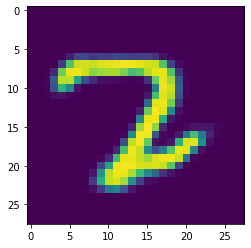

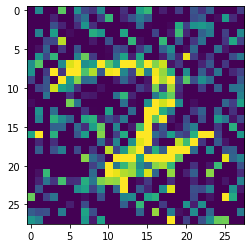

(28, 28, 1)

In [43]:
from PIL import Image
import matplotlib.pyplot as plt
sam = x_test_noisy[1402]
pred = model.predict(np.array([sam]))
pred = pred.reshape(28,28)
pred = np.array(pred*255,dtype=np.uint8)
plt.imshow(pred)
plt.show()

sam = np.array((sam*255),dtype=np.uint8)

im = Image.fromarray(sam.reshape((28,28)))
im.save('in.png')

#im.shape
plt.imshow(sam.reshape((28,28)))
plt.show()
sam.shape